#Aarif Farooq Bhat-(2019-310-001)

#Miltiple Disease Prediction : Heart,Diabetes & Parkinson's Diseases

#Parkinson's Disease prediction using SVM

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [54]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1  --> Parkinson's Positive

0 --> Healthy

In [ ]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

Data Pre-Processing

Separating the features & Target


1.   axis -->1 means drop column.
2.   axis --> 0 means drop row.



In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

1.   Displaying all features except Target Variable

2.   Displaying data for training and testing

In [ ]:
print(X)

Displaying all features except Target Variable





In [ ]:
print(Y)

Splitting the data to training data & Test data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data for training the model.

In [ ]:
print(X_train)

Data for testing the model.

In [ ]:
print(X_test)

Model Training-SVM

In [33]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

Model Evaluation






Accuracy Score

In [35]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

In [38]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Statistical data visualization.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # seaborn's method to set its chart style

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['X', 'Y'])

for col in 'XY':
    plt.hist(data[col], density=True, alpha=0.5)

Smooth estimate of the distribution using kernel density estimation.

In [ ]:
sns.kdeplot(data=data, fill=True);

Pass `x` and `y` columns to `kdeplot`, we instead get a two-dimensional visualization of the joint density.


In [ ]:
sns.kdeplot(data=data, x='X', y='Y');

Visualizing the multidimensional relationships among the samples.

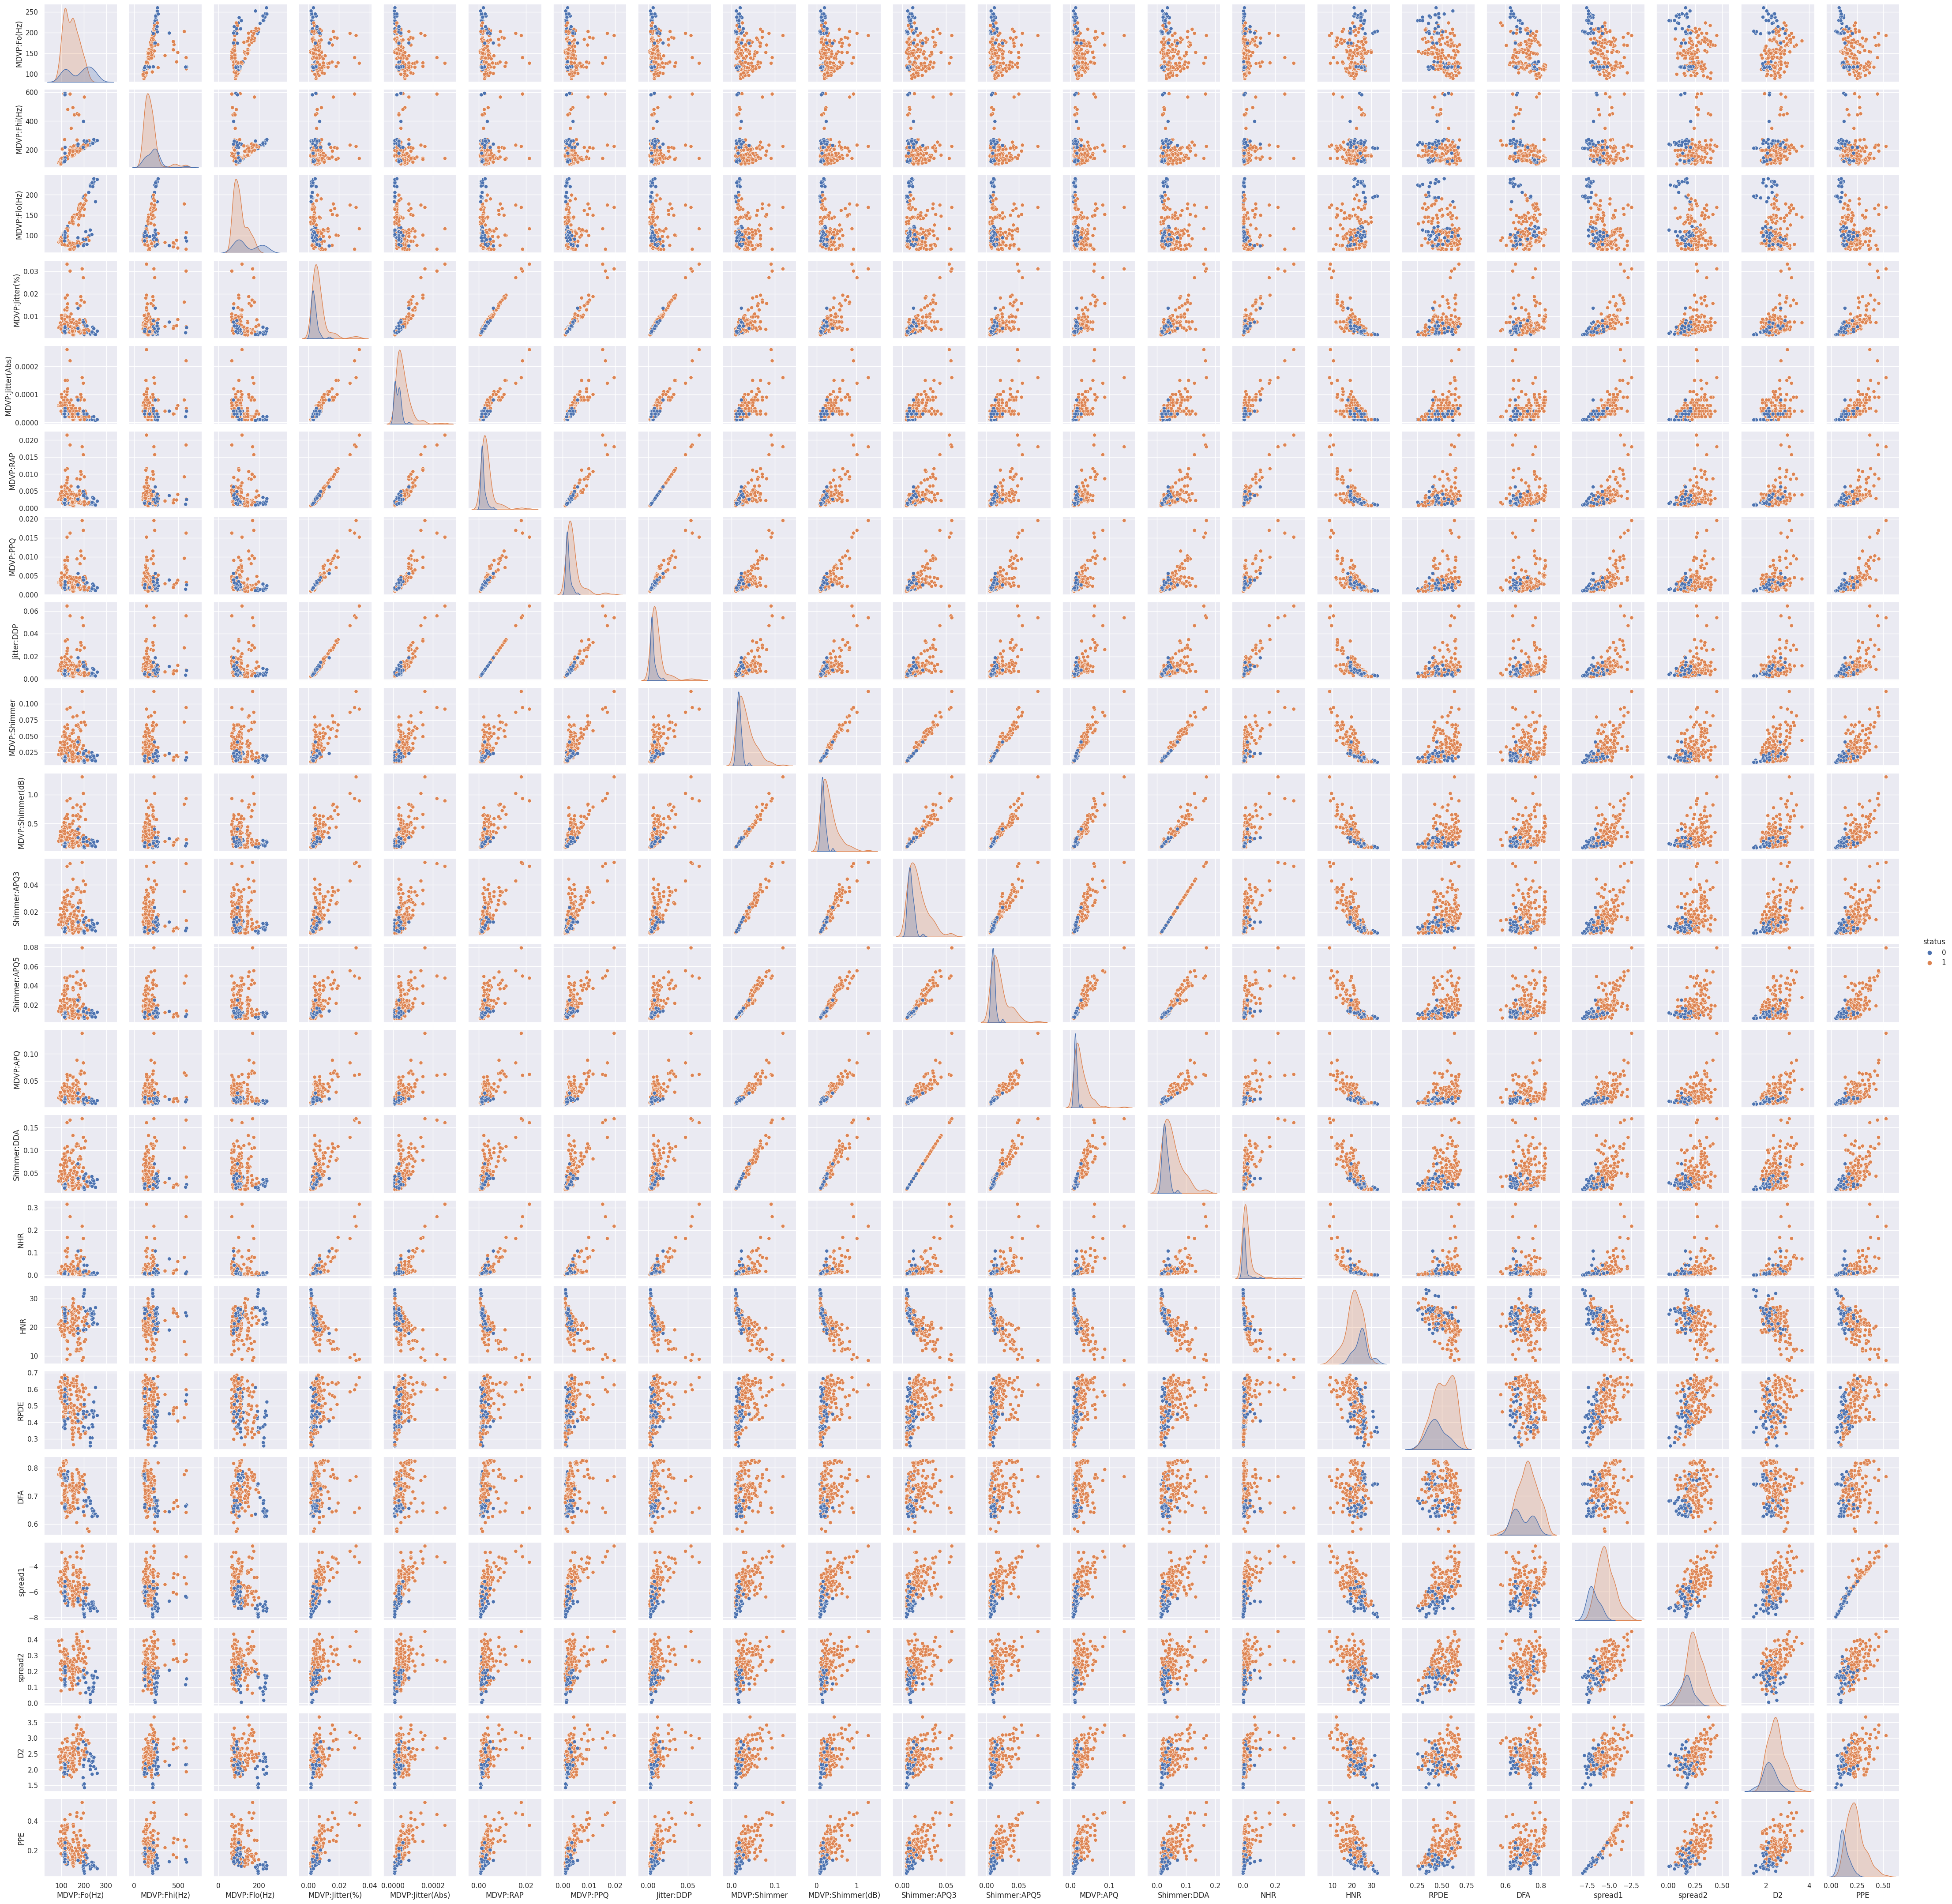

In [65]:
sns.pairplot(parkinsons_data, hue='status', height=2);

Building a Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person is suffering from Parkinsons")


Saving the trained SVM model.
Pickle is used to save the model using dump() function.

In [44]:
import pickle

Saving the trained model in variable "filename"

In [45]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)